# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [2]:
# your code here
dates= pd.date_range(start= '08/01/2018' , end='11/01/2018', freq= 'D')

Generate the values for the wite noise process representing Nina's commute in August and September.

In [3]:
# your code here
mean = 25
std = 2
num_samples = 93
samples = np.random.normal(mean, std, size=num_samples)

Create a time series with the dates and the commute times.

In [4]:
# your code here
df= pd.DataFrame(dates)

In [5]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [6]:
df['Times']= samples

In [7]:
df.head()

,0,Times
0,2018-08-01,25.945972
1,2018-08-02,23.637148
2,2018-08-03,25.484879
3,2018-08-04,21.598529
4,2018-08-05,26.506286


In [8]:
df['Date']= pd.to_datetime(df.iloc[:,0])

In [9]:
df.head()

,0,Times,Date
0,2018-08-01,25.945972,2018-08-01
1,2018-08-02,23.637148,2018-08-02
2,2018-08-03,25.484879,2018-08-03
3,2018-08-04,21.598529,2018-08-04
4,2018-08-05,26.506286,2018-08-05


In [10]:
df.set_index(df['Date'],drop=True, inplace= True)

In [11]:
df.drop(labels= 'Date', axis= 1).head()

,0,Times
Date,,
2018-08-01,2018-08-01,25.945972
2018-08-02,2018-08-02,23.637148
2018-08-03,2018-08-03,25.484879
2018-08-04,2018-08-04,21.598529
2018-08-05,2018-08-05,26.506286


In [12]:
df.drop(labels= 'Date', axis = 1, inplace= True)

In [13]:
df.head()

,0,Times
Date,,
2018-08-01,2018-08-01,25.945972
2018-08-02,2018-08-02,23.637148
2018-08-03,2018-08-03,25.484879
2018-08-04,2018-08-04,21.598529
2018-08-05,2018-08-05,26.506286


In [14]:
df.drop(df.columns[0], inplace= True, axis= 1)

In [15]:
df.head()

,Times
Date,
2018-08-01,25.945972
2018-08-02,23.637148
2018-08-03,25.484879
2018-08-04,21.598529
2018-08-05,26.506286


In [62]:
df['Times'].index

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

Visualize the time series and set appropriate axis labels.

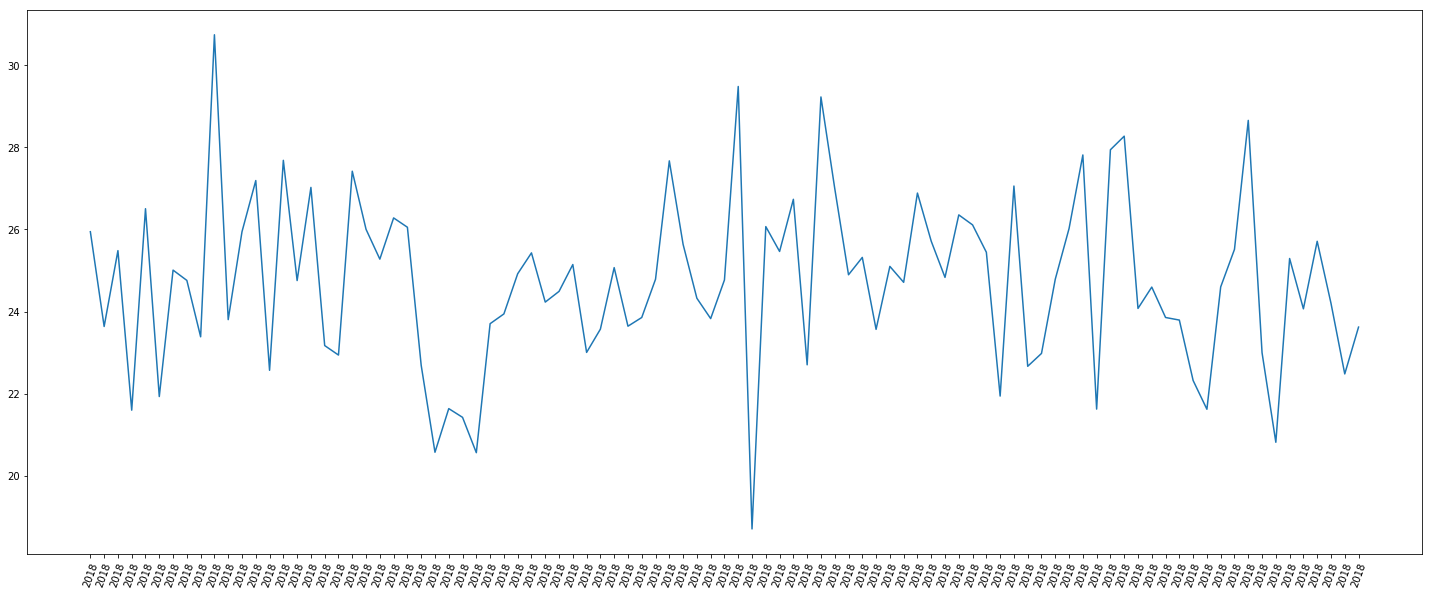

In [69]:
# your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.plot(df['Times'])
plt.xticks(rotation=70, ticks=df['Times'].index)
plt.show();

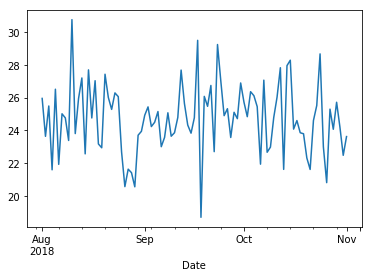

In [74]:
df['Times'].plot();

Print Nina's shortest and longest commute.

In [75]:
df.head()

,Times
Date,
2018-08-01,25.945972
2018-08-02,23.637148
2018-08-03,25.484879
2018-08-04,21.598529
2018-08-05,26.506286


In [76]:
# your code here

df['Times'].max()

30.743638789977833

In [77]:
df['Times'].min()

18.705166956912038

Look at the distribution of commute times.

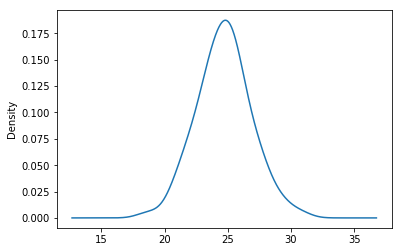

In [91]:
# your code here
df['Times'].plot.kde();

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [92]:
# your code here
df.mean()

Times    24.707018
dtype: float64

In [94]:
# your code here
df.std()

Times    2.133083
dtype: float64

Now, let's look at the mean and standard error for August and October respectively. 

In [99]:
# your code here

df['2018-08-01':'2018-08-31'].mean(), df['2018-10-01':'2018-10-31'].mean()
df['2018-08-01':'2018-08-31'].std(), df['2018-10-01':'2018-10-31'].std()

(Times    2.362903
 dtype: float64, Times    2.074112
 dtype: float64)

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong depencence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of november of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [207]:
# keep the random seed
np.random.seed(11)

start = 1000
dates= pd.date_range(start= "01/01/2010", end= "11/30/2010", freq="d")

mean = 0
std = 10
num_samples = len(dates)
error = np.random.normal(mean,std, size=num_samples)
# create a series with the specified dates


In [208]:
df= pd.DataFrame(dates, prices)

In [227]:
df.head()

,Price
Dates,
2010-01-01,1017.494547
2010-01-02,1014.633817
2010-01-03,1009.788166
2010-01-04,983.254981
2010-01-05,983.172134


In [230]:
df.reset_index(inplace= True)
df.columns= ['Price', 'Dates']
df.set_index('Dates', inplace= True)
pd.to_datetime(df['Dates'])

In [225]:
type(df["Dates"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [199]:
prices = []
start= 1000
for val in range(len(dates)):
    y = start + error[val]
    prices.append(y)
    start = y

In [228]:
df.head()

,Price
Dates,
2010-01-01,1017.494547
2010-01-02,1014.633817
2010-01-03,1009.788166
2010-01-04,983.254981
2010-01-05,983.172134


Visualize the time series with correct axis labels

In [181]:
# your code here

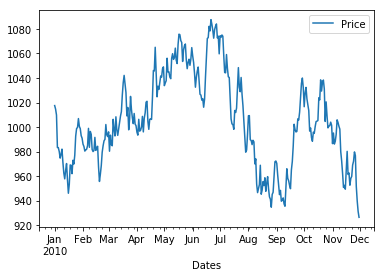

In [229]:
df.plot();

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [233]:
# keep the random seed

np.random.seed(11)

start = 1000
dates= pd.date_range(start= "01/01/2010", end= "11/30/2010", freq="d")

mean = 8
std = 10
num_samples = len(dates)
error = np.random.normal(mean,std, size=num_samples)
# create a series with the specified dates
prices = []
start= 1000
for val in range(len(dates)):
    y = start + error[val]
    prices.append(y)
    start = y
    
df_drift = pd.DataFrame(dates, prices)


In [235]:
# your code here
df_drift.reset_index(inplace= True)

In [238]:
df_drift.columns= ['Dates', 'Prices']

In [243]:
df_drift.head()

,Prices
Dates,
2010-01-01,1025.494547
2010-01-02,1030.633817
2010-01-03,1033.788166
2010-01-04,1015.254981
2010-01-05,1023.172134


In [249]:
df_drift.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26', '2010-11-27', '2010-11-28',
               '2010-11-29', '2010-11-30'],
              dtype='datetime64[ns]', name='Dates', length=334, freq=None)

Note that there is a very strong drift here!

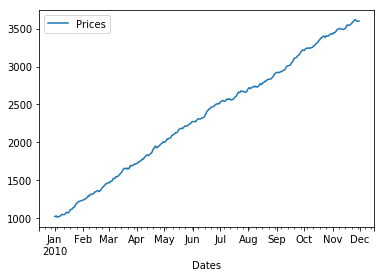

In [251]:
df_drift.plot();

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

In [255]:
df['white'] = np.nan

In [276]:
df.columns = ['Dates', 'Prices', 'White']

In [282]:
df.tail()

,Dates,Prices,White
329,2010-11-26,976.709969,25.0809
330,2010-11-27,951.629037,11.8508
331,2010-11-28,939.778208,8.54932
332,2010-11-29,931.228888,4.9015
333,2010-11-30,926.327392,NaN


In [293]:
# your code here

for price in range(len(dates)):
    try: 
        df['White'][price] = df['Prices'][price+1]- df['Prices'][price]
    except:
        break

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


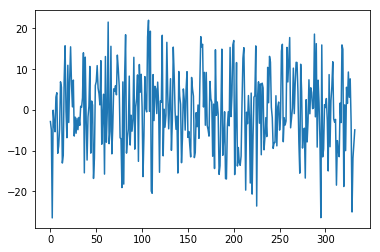

In [294]:
df['White'].plot();

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

In [292]:
# your code here
df_drift.head()

,Prices,White
Dates,,
2010-01-01,1025.494547,5.139270
2010-01-02,1030.633817,3.154349
2010-01-03,1033.788166,-18.533186
2010-01-04,1015.254981,7.917154
2010-01-05,1023.172134,4.803686


In [287]:
df_drift['White']= np.nan

In [291]:
for price in range(len(dates)):
    try:
        df_drift['White'][price] = df_drift['Prices'][price+1]- df_drift['Prices'][price]
    except:
        break 

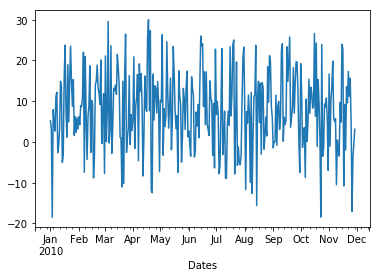

In [298]:
df_drift['White'].plot()

In [300]:
df_drift['White'].sum(),df['White'].sum()

(2572.8328447577965, -91.16715524220672)

In [301]:
df_drift['White'].mean()

7.726224759032422

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!